In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random
import pykitti

In [93]:
np.set_printoptions(suppress=True, precision=6)
np.set_printoptions(edgeitems=30, linewidth=120)
basedir, date, drive = '../datasets/KITTI_SAMPLE_RAW/KITTI_SAMPLE/RAW', '2011_09_26', '0009'
dataset = pykitti.raw(basedir, date, drive, frames=range(0, 445, 1))

In [322]:
ind1 = 1
ind2 = 3
img01 = np.array(dataset.get_cam2(ind1)) 
img02 = np.array(dataset.get_cam3(ind2))
K = dataset.calib.K_cam2


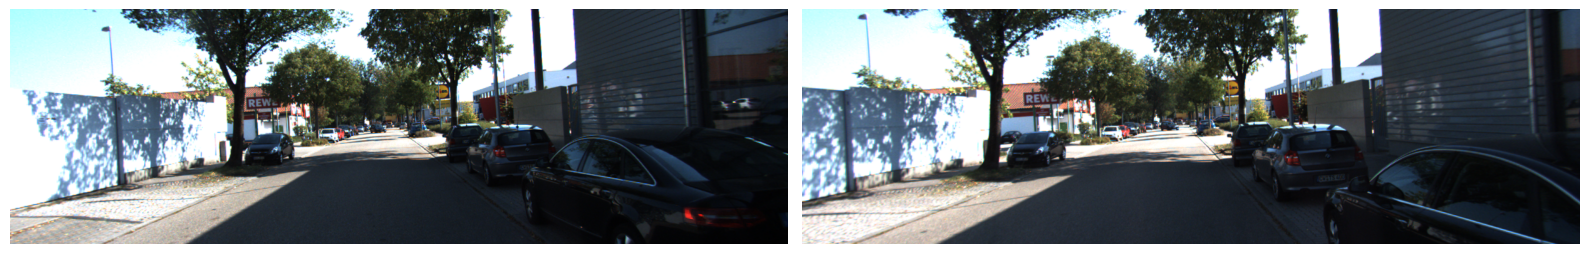

In [323]:
plt.figure(figsize=(16, 12))
plt.subplot(121)
plt.imshow(img01), plt.axis('off')
plt.subplot(122)
plt.imshow(img02), plt.axis('off')
plt.tight_layout()

In [324]:
s = cv2.SIFT_create()

In [325]:
kp_01, desc_01 = s.detectAndCompute(img01, None)
kp_02, desc_02 = s.detectAndCompute(img02, None)

In [326]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(desc_01,desc_02)

In [327]:
l1 = np.array([kp_01[match.queryIdx].pt for match in matches])
l2 = np.array([kp_02[match.trainIdx].pt for match in matches])

In [328]:
F, mask = cv2.findFundamentalMat(l1, l2,method=cv2.FM_8POINT+cv2.FM_RANSAC)
inlier_matches = [matches[i] for i in range(len(matches)) if mask[i]]

In [329]:
print(inlier_matches)

[< cv2.DMatch 000001486BCF59F0>, < cv2.DMatch 000001486BCF5AF0>, < cv2.DMatch 000001486BCF5130>, < cv2.DMatch 000001486BCF5F70>, < cv2.DMatch 000001486BCF5FB0>, < cv2.DMatch 000001486CE3F990>, < cv2.DMatch 000001486CE3F710>, < cv2.DMatch 000001486CE3F7F0>, < cv2.DMatch 000001486CE3F690>, < cv2.DMatch 000001486CE3F4B0>, < cv2.DMatch 000001486CE3F3D0>, < cv2.DMatch 000001486CE3F4F0>, < cv2.DMatch 000001486CE3F370>, < cv2.DMatch 000001486CE3F310>, < cv2.DMatch 000001486CE3F2B0>, < cv2.DMatch 000001486CE3F0B0>, < cv2.DMatch 000001486CE3F8D0>, < cv2.DMatch 000001486CE3FA30>, < cv2.DMatch 000001486CE3F770>, < cv2.DMatch 000001486CE3F930>, < cv2.DMatch 000001486CE3F870>, < cv2.DMatch 000001486CE3F150>, < cv2.DMatch 000001486CE3F030>, < cv2.DMatch 000001486CD885B0>, < cv2.DMatch 000001486CD88E30>, < cv2.DMatch 000001486CD88550>, < cv2.DMatch 000001486BDF3FB0>, < cv2.DMatch 000001486BDF3250>, < cv2.DMatch 000001486BDF3270>, < cv2.DMatch 000001486BDF3510>, < cv2.DMatch 000001486BDF3F30>, < cv2.D

(-0.5, 2483.5, 374.5, -0.5)

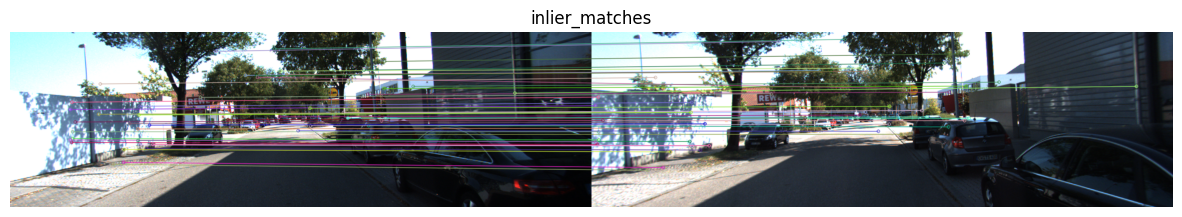

In [330]:
inlier_matches = [matches[i] for i in range(len(matches)) if mask[i]]
img4 = cv2.drawMatches(img01,kp_01,img02,kp_02,random.sample(inlier_matches, len(inlier_matches))[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 

plt.figure(figsize=(15,16))
plt.imshow(img4), plt.title('inlier_matches')
plt.axis('off')

In [374]:
indices = [[1, 3], [2, 4], [5, 8], [6, 12], [7, 19]]
for ind1, ind2 in indices:
    print(ind1)
    print(ind2)

1
3
2
4
5
8
6
12
7
19


In [331]:
E, mask = cv2.findEssentialMat(l1, l2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)


In [355]:
inlier_matches = [matches[i] for i in range(len(matches)) if mask[i]]
inlier_l1 = np.array([l1[i] for i in range(len(l1)) if mask[i]])
inlier_l2 = np.array([l2[i] for i in range(len(l2)) if mask[i]])

(-0.5, 2483.5, 374.5, -0.5)

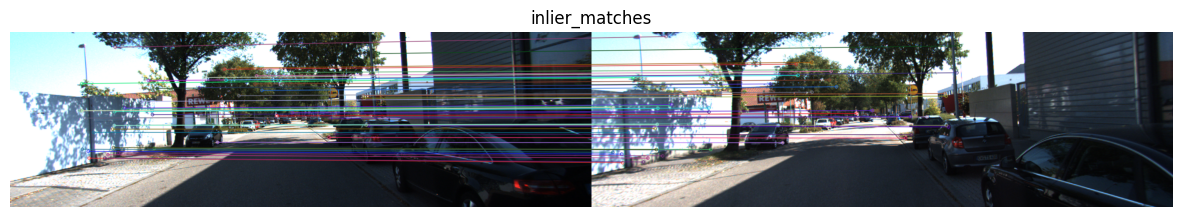

In [333]:
img4 = cv2.drawMatches(img01,kp_01,img02,kp_02,random.sample(inlier_matches, len(inlier_matches))[:50],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 

plt.figure(figsize=(15,16))
plt.imshow(img4), plt.title('inlier_matches')
plt.axis('off')

In [359]:
retval, R, t, mask_pose, pts_3d_h = cv2.recoverPose(E, inlier_l1, inlier_l2, K, distanceThresh=100)

In [360]:
pts_3d = pts_3d_h / pts_3d_h[3, :]

In [361]:
print(pts_3d)

[[-4.148701 -4.141975 -4.16859  -4.158718 -4.149558 -4.114332 -4.14139  -4.175661 -4.122345 -4.135058 -4.12662
  -4.157241 -4.143337 -4.123171 -4.145956 -4.098315 -4.194194 -4.110408 -4.120644 -4.146687 -4.145472 -4.168219
  -4.168219 -4.103268 -4.136702 -3.977487 -4.142904 -4.142904 -4.167618 -4.175078 ...  2.909268  8.876125 10.525736
   2.58843   2.460178  2.460178  1.729868 15.831692  5.721084 13.08151  13.08151   9.350106 26.043827  2.133909
   1.727176  1.727176  4.538802  3.272082  3.465659  3.465659  2.76271   2.885783  2.714494  3.067802  2.744629
   2.7554    2.752443  2.747966  2.756114  0.481036]
 [ 0.174499  0.415153 -0.050613 -0.193476  0.509403  0.816725  0.554054 -0.188263  0.193189  0.485433  0.357068
  -0.267077  0.328462  0.525572  0.390254  0.941177 -0.158254  0.853132  0.711154  0.180815  0.441962 -0.197345
  -0.197345  0.892967  0.028716  1.014609  0.221843  0.221843 -0.030418 -0.161164 ... -0.430314 -2.568723 -2.844024
  -1.549345 -1.399701 -1.399701  0.121855 -4

In [362]:
print(pts_3d_h[3, :])

[-0.132945 -0.132745 -0.131992 -0.132188 -0.132162 -0.132376 -0.131887 -0.131017 -0.132662 -0.131777 -0.132152
 -0.131213 -0.131149 -0.131518 -0.130801 -0.131402 -0.129236 -0.130991 -0.130848 -0.13056  -0.130359 -0.129776
 -0.129776 -0.130772 -0.130361 -0.134179 -0.129971 -0.129971 -0.129169 -0.128914 -0.129187 -0.131327 -0.129321
 -0.128771 -0.129    -0.128699 -0.12897  -0.128641 -0.129154 -0.128545 -0.129512 -0.078851 -0.078851 -0.12856
 -0.079761 -0.127556 -0.127821 -0.128203 -0.126853 -0.081436 -0.072225 -0.072225 -0.127948 -0.127278 -0.127471
 -0.127964 -0.127181 -0.127649 -0.127597 -0.158871 -0.126966 -0.127151 -0.127348 -0.126429 -0.126541 -0.126733
 -0.126733 -0.12674  -0.126181 -0.126481 -0.126417 -0.127348 -0.126061 -0.126163 -0.126163 -0.126032 -0.126032
 -0.125947 -0.126046 -0.125334 -0.125721 -0.12534  -0.124809 -0.12515  -0.125035 -0.125251 -0.124693 -0.125379
 -0.124819 -0.125027 -0.125463 -0.124893 -0.124893 -0.127047 -0.125026 -0.124649 -0.124588 -0.124035 -0.124035
 -

In [363]:
print(pts_3d)

[[-4.148701 -4.141975 -4.16859  -4.158718 -4.149558 -4.114332 -4.14139  -4.175661 -4.122345 -4.135058 -4.12662
  -4.157241 -4.143337 -4.123171 -4.145956 -4.098315 -4.194194 -4.110408 -4.120644 -4.146687 -4.145472 -4.168219
  -4.168219 -4.103268 -4.136702 -3.977487 -4.142904 -4.142904 -4.167618 -4.175078 ...  2.909268  8.876125 10.525736
   2.58843   2.460178  2.460178  1.729868 15.831692  5.721084 13.08151  13.08151   9.350106 26.043827  2.133909
   1.727176  1.727176  4.538802  3.272082  3.465659  3.465659  2.76271   2.885783  2.714494  3.067802  2.744629
   2.7554    2.752443  2.747966  2.756114  0.481036]
 [ 0.174499  0.415153 -0.050613 -0.193476  0.509403  0.816725  0.554054 -0.188263  0.193189  0.485433  0.357068
  -0.267077  0.328462  0.525572  0.390254  0.941177 -0.158254  0.853132  0.711154  0.180815  0.441962 -0.197345
  -0.197345  0.892967  0.028716  1.014609  0.221843  0.221843 -0.030418 -0.161164 ... -0.430314 -2.568723 -2.844024
  -1.549345 -1.399701 -1.399701  0.121855 -4

In [364]:
pts_3d.shape

(4, 872)

In [366]:
Z = pts_3d[2, :]
mask_pts = (pts_3d[2, :] >= np.percentile(Z, 5)) & (pts_3d[2, :]  <= np.percentile(Z, 95))
print(mask_pts)
new_pts_3d = pts_3d[:, mask_pts]
new_l1 = inlier_l1[mask_pts]
new_l2 = inlier_l2[mask_pts]


[False False False False False False False False False False False False False False  True False  True False  True
  True  True  True  True False  True False  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True  True  

In [367]:
Z = new_pts_3d[2,:]
print(Z.shape)

(784,)


In [368]:
len(Z)

784

In [369]:
len(new_l1)

784

In [370]:
new_l1

array([[137.205673, 217.315628],
       [138.411636, 154.984848],
       [138.965652, 253.826752],
       [139.047562, 193.353226],
       [139.360107, 223.109177],
       [139.648926, 150.606033],
       [139.648926, 150.606033],
       [141.879959, 176.256851],
       [142.637512, 197.965942],
       [142.637512, 197.965942],
       [143.13588 , 169.439682],
       [143.143707, 154.785919],
       [145.013168, 161.539825],
       [145.070251, 214.642502],
       [145.123688, 208.887939],
       [145.96669 , 225.785416],
       [146.112656, 282.588348],
       [146.179871, 176.837601],
       [146.774185, 188.401108],
       [147.474564, 272.994171],
       [147.614395, 248.070877],
       [148.277054, 193.915054],
       [148.306747, 218.449188],
       [148.367813, 114.977234],
       [148.367813, 114.977234],
       [149.430496, 158.442978],
       [150.056183, 117.877541],
       [150.682281, 169.304947],
       [151.505157, 176.272247],
       [151.620636, 242.602341],
       ...

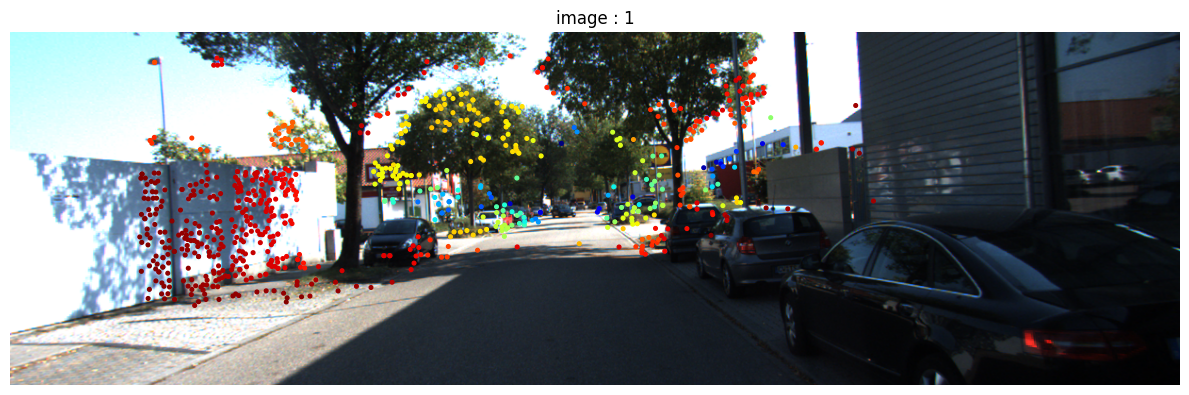

In [371]:
Z = new_pts_3d[2,:]
plt.figure(figsize=(12,14))
plt.imshow(img01), plt.axis('off'), plt.title(f'image : {ind1}')
plt.scatter(new_l1[:, 0], new_l1[:, 1], c=Z, s=7, cmap='jet_r') 
plt.tight_layout()

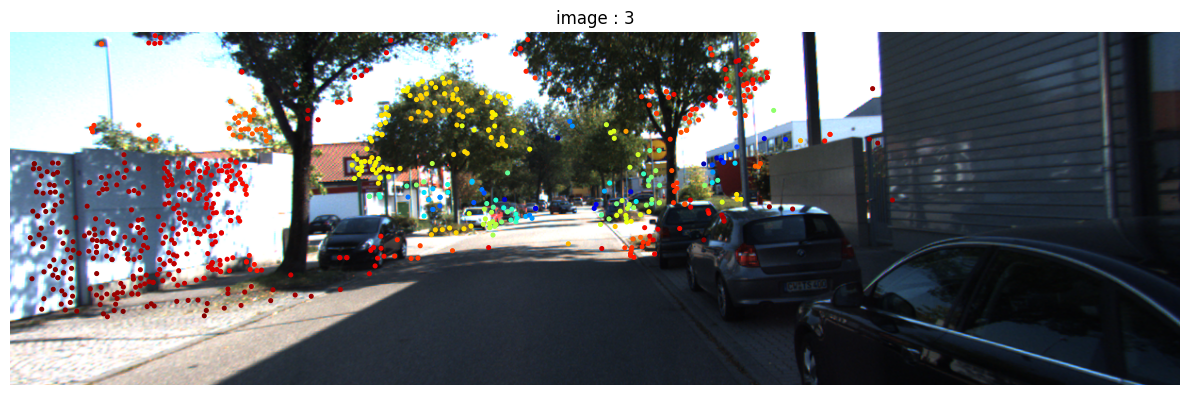

In [372]:
Z = new_pts_3d[2,:]
plt.figure(figsize=(12,14))
plt.imshow(img02), plt.axis('off'), plt.title(f'image : {ind2}')
plt.scatter(new_l2[:, 0], new_l2[:, 1], c=Z, s=7, cmap='jet_r') 

plt.tight_layout()